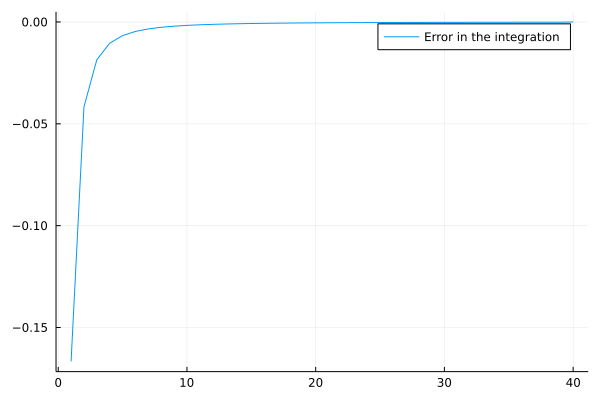

In [1]:
# Exercises 5 in Introduction to Types

using Plots

function trap(f::AbstractArray ,x::AbstractArray)
    integral=zero(eltype(x))
    for i in 1:length(x)-1
        integral = .5*(f[i]+f[i+1])*(x[i+1]-x[i]) + integral
    end
    return integral
end


function trap(f::AbstractArray ,x::AbstractRange)
    integral=zero(eltype(x))
    for i in 1:length(x)-1
        integral = .5*(f[i]+f[i+1])*(step(x)) + integral
    end
    # println("AbstractRange")
    return integral
end

function trap(f::Function ,x0::Real, xN::Real , N::Real)
    x=range(x0,xN,length=N)
    f_x=f.(x)
    # println("Real")
    return trap(f_x,x)
end



f(x)=x^2
g(x)=(x^3)/3
x0=0
xN=1

N = 40

err=zeros(N)

for i in 2:N
    err[i-1] = g(1.0)-trap(f, 0.0 , 1.0 , i)
end
plot([1:N] , err , label="Error in the integration")


In [2]:
# Exercise 1 in Generic Programming

using LinearAlgebra, Statistics, Base

struct UniformTrapezoidal
    count::Int
    Δ::Float64
end

function Base.iterate(S::UniformTrapezoidal, state=1)
    if state>S.count
        return nothing
    else
        if state==1 || state==S.count
            return (0.5*S.Δ, state+1)
            
        else
             return (S.Δ, state+1)
        end
    end
end

Integration(f,x) = dot(f.(x),UniformTrapezoidal(length(x),step(x)))


x = range(0.0, 1.0, length = 100)
S=UniformTrapezoidal(length(x),step(x))
f(x)= x^2
Integration(f,x)

0.3333503384008434